# Итоговая работа

In [605]:
#Загружаем необходимые для работы библиотеки
import numpy as np
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import mode
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import sklearn
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

__1.Загрузить файл hr.csv.__

In [469]:
hr = pd.read_csv("hr.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
#Посмотрим на данные в разных ракурсах
hr.shape

(14999, 10)

In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
#Пустоты по переменным
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

Опишем переменные:
* satisfaction_level       - уровень удовлетворенности сотрудника
* last_evaluation          - последняя оценка
* number_project           - число проектов
* average_montly_hours     - средне месячные часы
* time_spend_company       - стаж работы в компании
* Work_accident            - несчастные случаи на работе
* left                     - увольнение
* promotion_last_5years    - переводы в течение последних 5 лет
* sales                    - подразделение / направление продаж
* salary                   - заработная плата

__Вывод 1:__ датасет содержит ~15 000 наблюдений, большая часть переменных числовые, некоторые из них бинарные. Пропуски в данных не выявлены.

__2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).__

In [195]:
#Все основные статистики для числовых переменных, кроме моды мы наблюдаем на предыдущем этапе благодоря команде describe. 
#Осталось добавить моду, дисперсию и 1.5 IQR. Напишем функцию.
def my_describe(data):
    if data.dtypes != object:
        x = np.array([len(data), np.mean(data), mode(data)[0][0], np.var(data), np.std(data),
                     np.min(data), np.percentile(data, 25), np.percentile(data, 50), np.percentile(data, 75),
                     np.max(data), (np.percentile(data, 75)-np.percentile(data, 25))*1.5])
        return x.round(2)
    else: 
        y = np.array([len(data), np.NaN, mode(data)[0][0], np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN])
        return y

In [202]:
x=[]

for i in hr.columns:
    x.append(my_describe(hr[i]))

my_stat = pd.DataFrame(np.array(x).T)
my_stat.columns = hr.columns
my_stat = my_stat.rename(index={0:"count", 1:"mean", 2:"mode", 3:"variance", 4:"std", 5:"min",
                                6:"25%", 7:"50% or median", 8:"75%", 9:"max", 10:"1.5 IQR"},)
my_stat

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999.0,14999,14999
mean,0.61,0.72,3.8,201.05,3.5,0.14,0.24,0.02,nan,nan
mode,0.1,0.55,4.0,135.0,3.0,0.0,0.0,0.0,sales,low
variance,0.06,0.03,1.52,2494.15,2.13,0.12,0.18,0.02,nan,nan
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14,nan,nan
min,0.09,0.36,2.0,96.0,2.0,0.0,0.0,0.0,nan,nan
25%,0.44,0.56,3.0,156.0,3.0,0.0,0.0,0.0,nan,nan
50% or median,0.64,0.72,4.0,200.0,3.0,0.0,0.0,0.0,nan,nan
75%,0.82,0.87,5.0,245.0,4.0,0.0,0.0,0.0,nan,nan
max,1.0,1.0,7.0,310.0,10.0,1.0,1.0,1.0,nan,nan


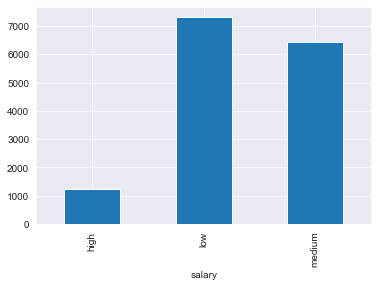

In [233]:
#Для факторов также хочется посмотреть не только моду, но и количественное распределение по значениям фактора
hr_compare_a = hr.groupby('salary').count()['satisfaction_level']
hr_compare_a.plot(kind='bar', stacked=True)

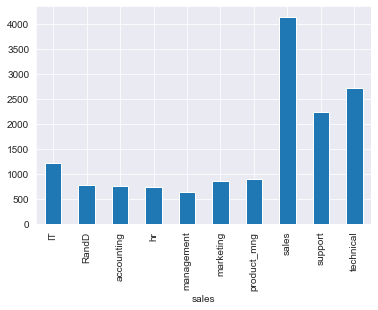

In [234]:
hr_compare_b = hr.groupby('sales').count()['satisfaction_level']
hr_compare_b.plot(kind='bar', stacked=True)

In [262]:
#Интересно посмотреть, как зарплаты распределяются по бизнесам
piv = pd.pivot_table(hr, values='satisfaction_level', index=['sales'], columns=['salary'], aggfunc=len)

cm = sns.light_palette("green", as_cmap=True)

s = piv.style.background_gradient(cmap=cm)
s

salary,high,low,medium
sales,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


In [267]:
#Проверим гипотезу об отличии уровня зарплат по бизнесам с помощью критерия хи-квадрат
from scipy.stats import chi2_contingency
chi2_contingency(piv)

(700.9193416421746,
 3.621444754713951e-137,
 18,
 array([[ 101.19334622,  598.48869925,  527.31795453],
        [  64.90559371,  383.87172478,  338.22268151],
        [  63.25615041,  374.11640776,  329.62744183],
        [  60.9469298 ,  360.45896393,  317.59410627],
        [  51.95746383,  307.29248617,  270.75005   ],
        [  70.76111741,  418.50310021,  368.73578239],
        [  74.38989266,  439.96479765,  387.64530969],
        [ 341.43476232, 2019.35062337, 1779.21461431],
        [ 183.83045536, 1087.23008201,  957.93946263],
        [ 224.32428829, 1326.72311487, 1168.95259684]]))

__Вывод 2:__ статистически подтвердили отличие в уровнях зарплат по бизнесам.

__3.Рассчитать и визуализировать корреляционную матрицу для переменных.__

In [272]:
#Прежде проделаем следующее: у нас есть две факторные переменные, причём одна из них категориальная (sales), 
#а одна порядковая (salary). Следоватьельно порядковую переменную можно представить как числовую и использовать для
#матрицы корреляции.

def sr(value):
    if value == 'low':
        return 1
    elif value == 'medium':
        return 2
    elif value == 'high':
        return 3

hr['salary_number'] = hr['salary'].apply(sr)
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,salary_number
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


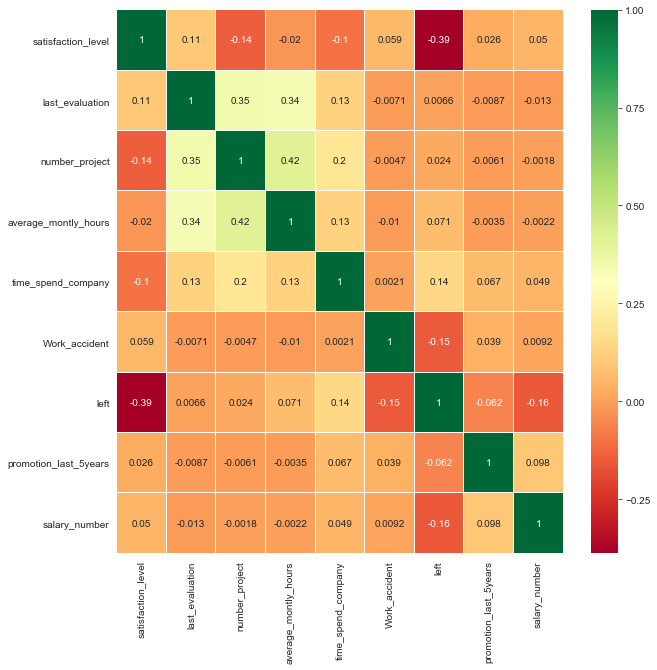

In [274]:
sns.heatmap(hr.corr(),yticklabels=True,xticklabels=True, annot=True, cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

__Вывод 3:__ подтверждается известная обратная корреляция между удовлетвороенностью и увольнениями, то есть чем выше удовлетворенность, тем мень вероятность увольньнения. Кроме того, на уровен 16% есть обратная корреляция между увольнением и уровнем зарплаты. 

__4.Визуализировать несколько взаимосвязей между переменными.__

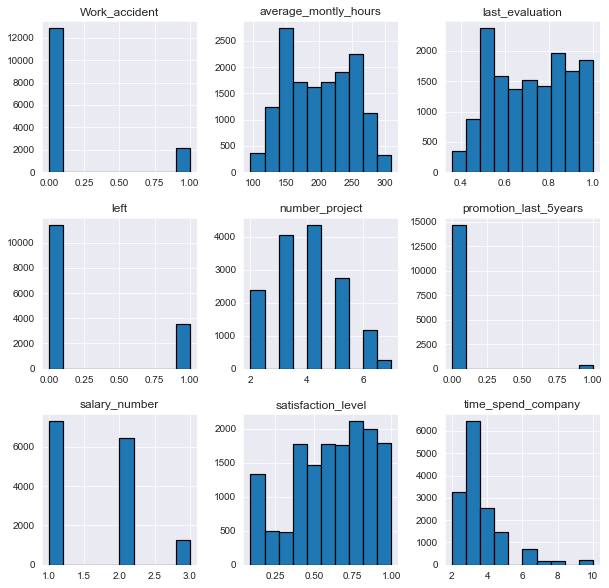

In [276]:
#Прежде всего гистограммы для всех переменных
hr.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

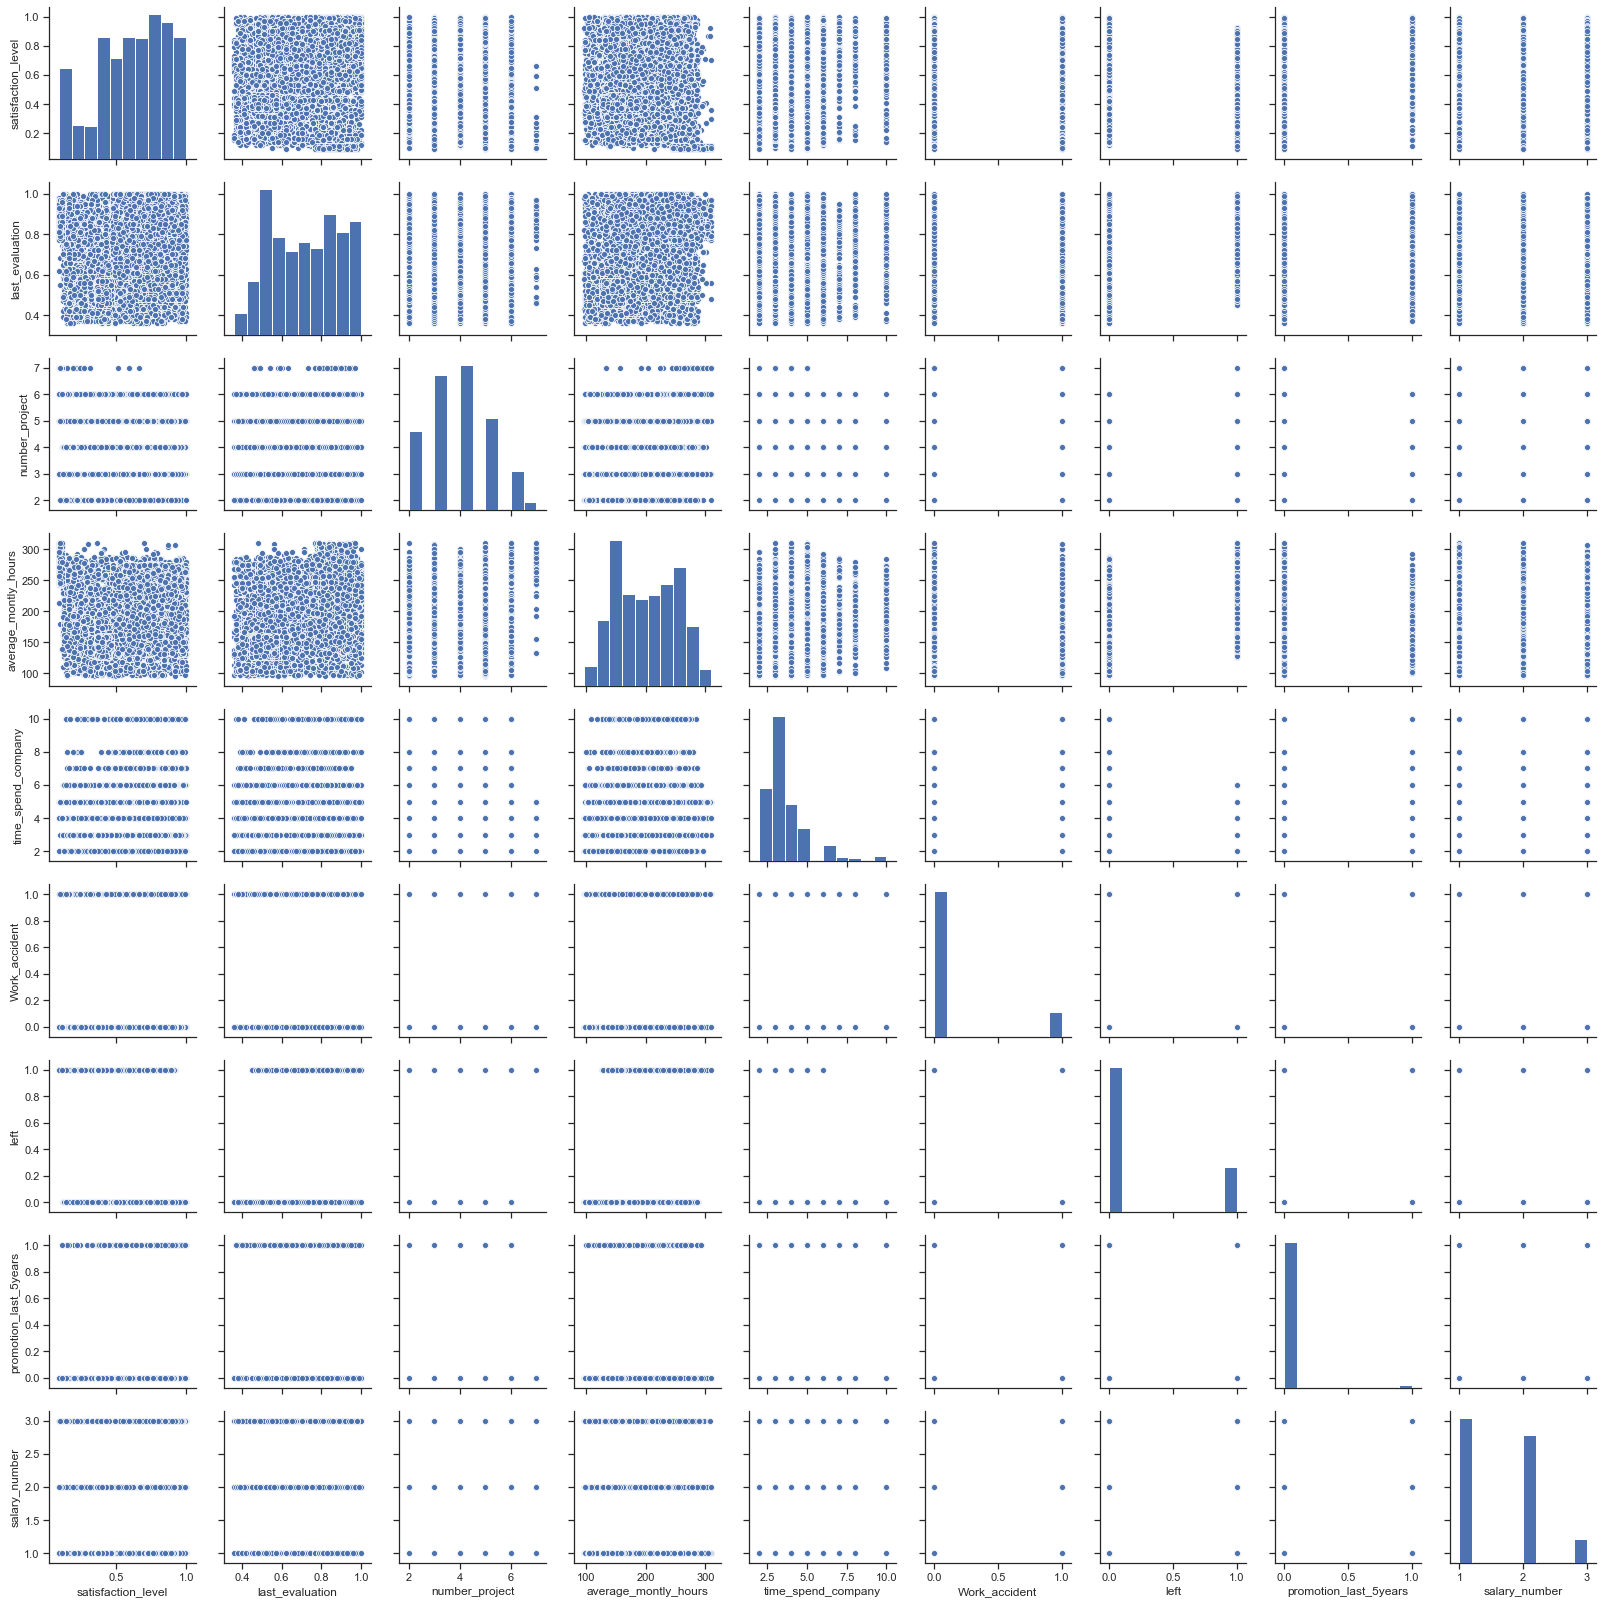

In [277]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(hr[[]])

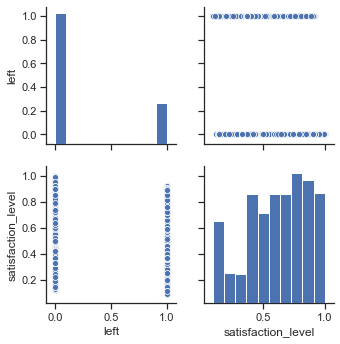

In [279]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(hr[['left', 'satisfaction_level']])

__Вывод 4:__ графики подтверждают основные корреляции, что мы выделили на предудыщем шаге, но сила их невелика.

__5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.__

In [282]:
#Ещё под одним углом проверим разницу по уровню удовлетворенности между уволенными и не уволенными
hr_left_sf = hr[hr['left']==1]['satisfaction_level']

hr_nonleft_sf = hr[hr['left']==0]['satisfaction_level']

stats.ttest_ind(hr_left_sf, hr_nonleft_sf)

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

In [ ]:
#Увольнение и происшествиями на работе

In [284]:
hr_left_wa = hr[hr['left']==1]['Work_accident']

hr_nonleft_wa = hr[hr['left']==0]['Work_accident']

stats.ttest_ind(hr_left_wa, hr_nonleft_wa)

Ttest_indResult(statistic=-19.165804033090176, pvalue=6.613049400453939e-81)

__Вывод 5:__ обнаружена статистически достоверная разница между увольнением и уровнем удовлетворенности, увольненим и происшествиями на работе.

__6.Рассчитать сколько работников работает в каждом департаменте.__

In [299]:
grouped = hr.groupby('sales').count()['satisfaction_level']
grouped = grouped.sort_values(ascending=False)
grouped

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: satisfaction_level, dtype: int64

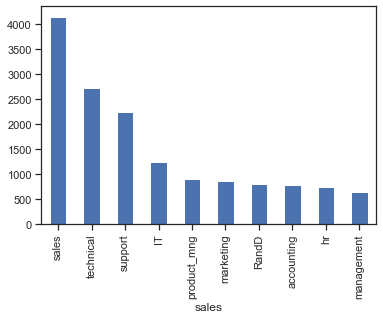

In [298]:
grouped.plot(kind='bar', stacked=True)

In [307]:
#Чисто профессиональное, сколько сотрудников на 1-го HR-а в компании:
grouped.sum() / grouped[8]

20.29634641407307

__Вывод 6:__ значительно больше всего сотрудников работает в Sales, менеджеров меньше всего.

__7.Показать распределение сотрудников по зарплатам.__

In [313]:
l_salary = hr[hr['salary_number']==1]['salary_number']
m_salary = hr[hr['salary_number']==2]['salary_number']
h_salary = hr[hr['salary_number']==3]['salary_number']

C:\Users\1\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\1\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


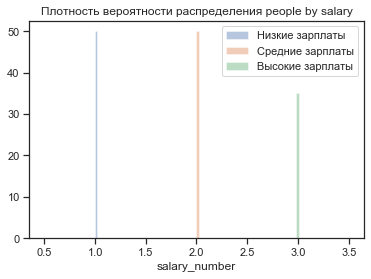

In [314]:
sns.distplot(l_salary)
sns.distplot(m_salary)
sns.distplot(h_salary)
plt.title('Плотность вероятности распределения people by salary')
plt.legend(['Низкие зарплаты', 'Средние зарплаты', 'Высокие зарплаты'])
plt.show()

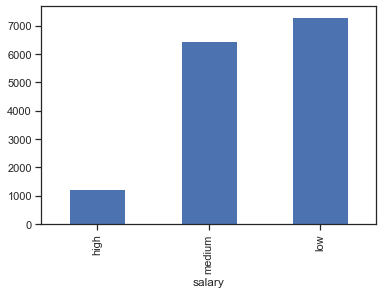

In [324]:
#Переменная ненепрерывная, поэтому лучше так
grp = hr.groupby('salary').count()['satisfaction_level']
grp = grp.sort_values()
grp.plot.bar(stacked=True)

__Вывод 7:__ больше всего сотрудников с низкой зарплатой, меньше всего сотрудников с высокой зарплатой.

__8.Показать распределение сотрудников по зарплатам совместно с департаментами.__

In [331]:
#Уже делали на шаге выше, повторим
piv = pd.pivot_table(hr, values='satisfaction_level', index=['sales'], columns=['salary'], aggfunc=len)

cm = sns.light_palette("green", as_cmap=True)

s = piv.style.background_gradient(cmap=cm, axis=0)
s

salary,high,low,medium
sales,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


In [387]:
#Таблица вверху непозволяет судить о самых высоких/низких зарплатах по департаментам,
#поэтому представим все в относительных значениях, а именно в процентах от суммы по столбцу

x = np.array([(piv['high'] / piv['high'].sum()) * 100, 
         (piv['medium'] / piv['medium'].sum()) * 100,
        (piv['low'] / piv['low'].sum()) * 100])
piv2 = pd.DataFrame(x.T.round(2))
piv2.columns = piv.columns
piv2 = piv2.rename(index={0:"IT", 1:"RandD", 2:"accounting", 3:"hr", 4:"management", 5:"marketing",
                                6:"product_mng", 7:"sales", 8:"support", 9:"technical"},)

cm = sns.light_palette("green", as_cmap=True)

s = piv2.style.background_gradient(cmap=cm, axis=0)
s

salary,high,low,medium
IT,6.71,8.3,8.32
RandD,4.12,5.77,4.98
accounting,5.98,5.2,4.89
hr,3.64,5.57,4.58
management,18.19,3.49,2.46
marketing,6.47,5.83,5.49
product_mng,5.5,5.94,6.16
sales,21.75,27.49,28.69
support,11.4,14.61,15.66
technical,16.25,17.79,18.75


__Вывод 8:__ интересно, но больше всего сотрудников с высокими, средними и низкими зарплатами в Sales. Ещё много высоких зарплата в Managment.

__9.Сколько сотрудников покинули компанию.__

left
0    11428
1     3571
Name: salary, dtype: int64

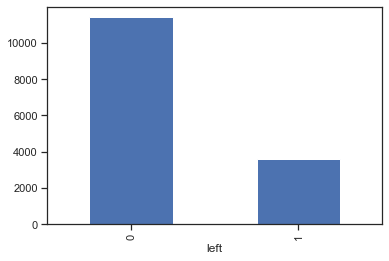

In [389]:
left_compare = hr.reset_index().groupby(['left']).count()["salary"]
left_compare.plot(kind='bar', stacked=True)
left_compare

__Вывод 9:__ компанию покинуло 23% процента от списочной численности сотрудников. Классы несбалансированы, мы должны это учитывать далее при построении модели.

__10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.__

In [425]:
#Построим модель логистической регрессии для признаков, которые наиболее коррелируют с left.
output_y = hr['left']
input_x = hr[['satisfaction_level', 'Work_accident', 'time_spend_company' , 'salary_number']]

#Сбалансируем классы
ros = RandomOverSampler(random_state=0)
X = input_x
Y = output_y
ros.fit(X, Y)
X_resampled, y_resampled = ros.fit_sample(X, Y)

#Кросс-валидация
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [427]:
#Множественная логистическая регрессия
model = LogisticRegression()
model.fit(X_train, y_train)
predicted_classes = model.predict(X_test)
accuracy = accuracy_score(y_test.flatten(),predicted_classes)
print('Точность предсказания модели: ', accuracy)
parameters = model.coef_

C:\Users\1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Точность предсказания модели:  0.7587489063867017


In [443]:
YrYp = pd.DataFrame()
YrYp['y_real'] = y_test
YrYp['y_pred'] = predicted_classes

In [445]:
#Построим Confusion Matrix
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(YrYp['y_real'], YrYp['y_pred']).ravel()
sklearn.metrics.confusion_matrix(YrYp['y_real'], YrYp['y_pred'])

array([[1722,  606],
       [ 497, 1747]], dtype=int64)

In [446]:
#Посмотрим все метрики качества
print(f'Accuracy = {round((tp + tn) / (tp + fp + tn + fn), 2)},\nPrecision = {round((tp) / (tp + fp), 2)},\nRecall = {round((tp) / (tp + fn), 2)},\nSensitivity = {round((tp) / (tp + fn), 2)},\nSpecificity = {round((tn) / (tn + fp), 2)}\n')

Accuracy = 0.76,
Precision = 0.74,
Recall = 0.78,
Sensitivity = 0.78,
Specificity = 0.74



__Вывод 10_1:__ мы получили довольно неплохую модель с общей точностью на уровне 0.76. Но, что более важно Prescion и Recall очень высоки, это говорит о том, что с помощью satisfaction_level, Work_accident, time_spend_company и salary_number мы можем довольно неплохо прогнозировать увольнение сотрудника.

In [664]:
#Предположим, что не все переменные объясняются линейной связью с left и построим модель слуайного леса, улучшит ли это нашу
#модель?

#Начнём с препроцессинга числовых переменных
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(hr[['satisfaction_level', 'last_evaluation', 'number_project',
   'average_montly_hours', 'time_spend_company']])
df_norm = pd.DataFrame(np_scaled)
df_norm.columns = ['n_satisfaction_level', 'n_last_evaluation', 'n_number_project',
   'n_average_montly_hours', 'n_time_spend_company']

hr_new = hr.drop(['satisfaction_level', 'last_evaluation', 'number_project',
   'average_montly_hours', 'time_spend_company'], axis=1)
hr_new['satisfaction_level'] = df_norm['n_satisfaction_level']
hr_new['n_last_evaluation'] = df_norm['n_last_evaluation']
hr_new['n_number_project'] = df_norm['n_number_project']
hr_new['n_average_montly_hours'] = df_norm['n_average_montly_hours']
hr_new['n_time_spend_company'] = df_norm['n_time_spend_company']

In [665]:
hr_new['salary_number'] = hr_new['salary'].apply(sr)

In [666]:
#Сделаем дамми-переменны для sales, salary, Work_accident, promotion_last_5years и left
def dummies(data):
    name = data.name
    ls=[]
    ls_new=[]
    d_sales = pd.get_dummies(data) 
    ls = d_sales.columns
    for i in ls:
        ls_new.append(name+"_"+str(i))
    d_sales.columns = ls_new
    return d_sales


hr_new = pd.concat([hr_new, dummies(hr['sales'])], axis=1)
hr_new = pd.concat([hr_new, dummies(hr_new['salary_number'])], axis=1)
hr_new = pd.concat([hr_new, dummies(hr_new['Work_accident'])], axis=1)
hr_new = pd.concat([hr_new, dummies(hr_new['promotion_last_5years'])], axis=1)
hr_new = hr_new.drop(['sales', 'salary', 'Work_accident', 'promotion_last_5years','salary_number'], axis=1)

hr_new.head()

,left,satisfaction_level,n_last_evaluation,n_number_project,n_average_montly_hours,n_time_spend_company,sales_IT,sales_RandD,sales_accounting,sales_hr,...,sales_sales,sales_support,sales_technical,salary_number_1,salary_number_2,salary_number_3,Work_accident_0,Work_accident_1,promotion_last_5years_0,promotion_last_5years_1
0,1,-0.362637,-0.46875,-1.0,-0.429907,-0.75,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
1,1,0.560440,0.56250,0.2,0.551402,0.00,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
2,1,-0.956044,0.62500,1.0,0.644860,-0.50,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
3,1,0.384615,0.59375,0.2,0.186916,-0.25,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,1,-0.384615,-0.50000,-1.0,-0.411215,-0.75,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0


In [667]:
#Подготавливаем модель
output_y = hr_new['left']
input_x = hr_new.drop('left', axis=1)

#Сбалансируем классы
ros = RandomOverSampler(random_state=0)
X = input_x
Y = output_y
ros.fit(X, Y)
X_resampled, y_resampled = ros.fit_sample(X, Y)

# #Теперь сделаем из перенной left дамми-переменную
Y = pd.DataFrame(y_resampled)
Y.columns= ['left']
Y = dummies(Y['left'])

#Выделим таргет
le=LabelEncoder()
targets=(Y[:]==1).idxmax(1)
print(targets.value_counts())
Y=le.fit_transform(targets)

#Кросс-валидация
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y, test_size=0.2)

left_0    11428
left_1    11428
dtype: int64


No handles with labels found to put in legend.


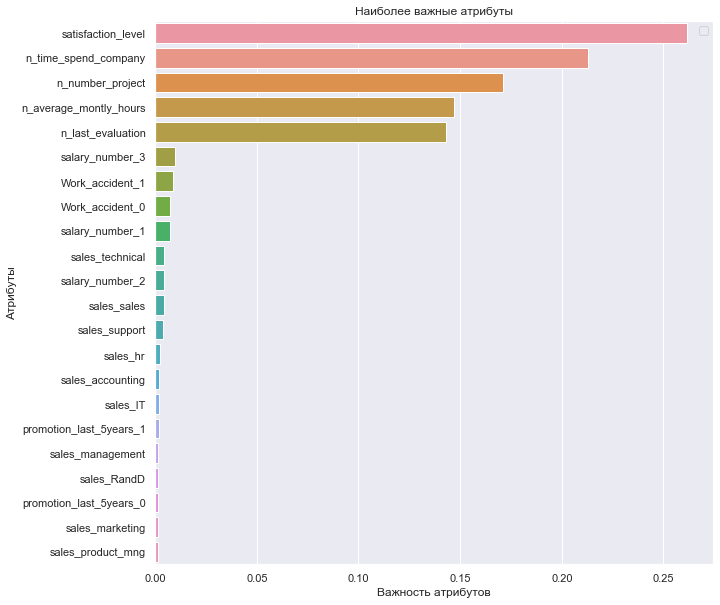

In [668]:
# создаем модель деревья решений
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train,y_train)

headers = list(input_x.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [669]:
#Accuracy
model.score(X_test, y_test)

0.9980314960629921

In [673]:
YrYp2 = pd.DataFrame()
YrYp2['y_real'] = y_test
YrYp2['y_pred'] = model.predict(X_test)

In [676]:
#Построим Confusion Matrix
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(YrYp2['y_real'], YrYp2['y_pred']).ravel()
sklearn.metrics.confusion_matrix(YrYp2['y_real'], YrYp2['y_pred'])

array([[2244,    6],
       [   3, 2319]], dtype=int64)

In [677]:
#Посмотрим все метрики качества
print(f'Accuracy = {round((tp + tn) / (tp + fp + tn + fn), 2)},\nPrecision = {round((tp) / (tp + fp), 2)},\nRecall = {round((tp) / (tp + fn), 2)},\nSensitivity = {round((tp) / (tp + fn), 2)},\nSpecificity = {round((tn) / (tn + fp), 2)}\n')

Accuracy = 1.0,
Precision = 1.0,
Recall = 1.0,
Sensitivity = 1.0,
Specificity = 1.0



__Вывод 10_2:__ потрясающая модель по метрикам качества! В жизни таких не бывает :)

__Общий вывод__: главные причины, по которым сотрудники увольняются - это низкий уровень удовлетворенности, длительный срок работы в компании, большое число проектов, за которыми сотрудники закреплены, среднее количество часов работы и последняя полученная оценка.